<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/Classifying_Different_Types_of_Smoker_and_Drinker_by_Analyzing_Body_Signal_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load DataSet**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/8th Semester/DataMining&MachineLearning/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


# **Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df.isna().sum( )

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
df.DRK_YN = le.fit_transform(df.DRK_YN)
df.sex = le.fit_transform(df.sex)

In [7]:
df.DRK_YN.unique()

array([1, 0])

In [8]:
df.DRK_YN.value_counts()

0    495858
1    495488
Name: DRK_YN, dtype: int64

In [9]:
df.SMK_stat_type_cd.unique()

array([1., 3., 2.])

In [10]:
df.SMK_stat_type_cd = df.SMK_stat_type_cd.astype(int)

In [11]:
df.SMK_stat_type_cd.unique()

array([1, 3, 2])

In [12]:
df.SMK_stat_type_cd.value_counts()

1    602441
3    213954
2    174951
Name: SMK_stat_type_cd, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])

<ipython-input-13-128d76b7958e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])


In [14]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,...,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,1,1
1,1.0,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,...,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,3,0
2,1.0,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,...,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,1,0
3,1.0,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,...,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,1,0
4,1.0,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,...,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,1,0


# **Exploratory Data Analysis**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991346.0,0.531010,0.499038,0.0,0.000000,1.000000,1.000000,1.0
age,991346.0,0.424838,0.218174,0.0,0.230769,0.384615,0.615385,1.0
height,991346.0,0.537344,0.154716,0.0,0.416667,0.500000,0.666667,1.0
weight,991346.0,0.332905,0.108819,0.0,0.260870,0.304348,0.391304,1.0
waistline,991346.0,0.073898,0.011958,0.0,0.066700,0.073663,0.080525,1.0
sight_left,991346.0,0.089881,0.061831,0.0,0.061224,0.091837,0.112245,1.0
sight_right,991346.0,0.089636,0.061712,0.0,0.061224,0.091837,0.112245,1.0
hear_left,991346.0,0.031495,0.174650,0.0,0.000000,0.000000,0.000000,1.0
hear_right,991346.0,0.030476,0.171892,0.0,0.000000,0.000000,0.000000,1.0
SBP,991346.0,0.269090,0.070598,0.0,0.218447,0.257282,0.310680,1.0


In [16]:
x = df.iloc[:,0:22]
x

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,...,0.070441,0.005796,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078
1,1.0,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,...,0.085566,0.006659,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052
2,1.0,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,...,0.045808,0.004933,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134
3,1.0,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,...,0.073898,0.009249,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034
4,1.0,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,...,0.073034,0.007399,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,0.384615,0.750000,0.478261,0.084864,0.142857,0.142857,0.0,0.0,0.228155,...,0.072602,0.005549,0.024228,0.013805,0.583333,0.0,0.009193,0.002501,0.004855,0.026052
991342,1.0,0.230769,0.666667,0.434783,0.078708,0.091837,0.142857,0.0,0.0,0.252427,...,0.044512,0.004809,0.016217,0.004637,0.616667,0.0,0.010215,0.001300,0.002219,0.014028
991343,0.0,0.307692,0.416667,0.217391,0.060545,0.091837,0.061224,0.0,0.0,0.208738,...,0.075627,0.011715,0.014850,0.016440,0.554167,0.0,0.007150,0.002901,0.003607,0.016032
991344,1.0,0.076923,0.750000,0.304348,0.064581,0.142857,0.091837,0.0,0.0,0.252427,...,0.039758,0.004563,0.014068,0.005480,0.562500,0.0,0.007150,0.002000,0.001803,0.016032


**Visualization**

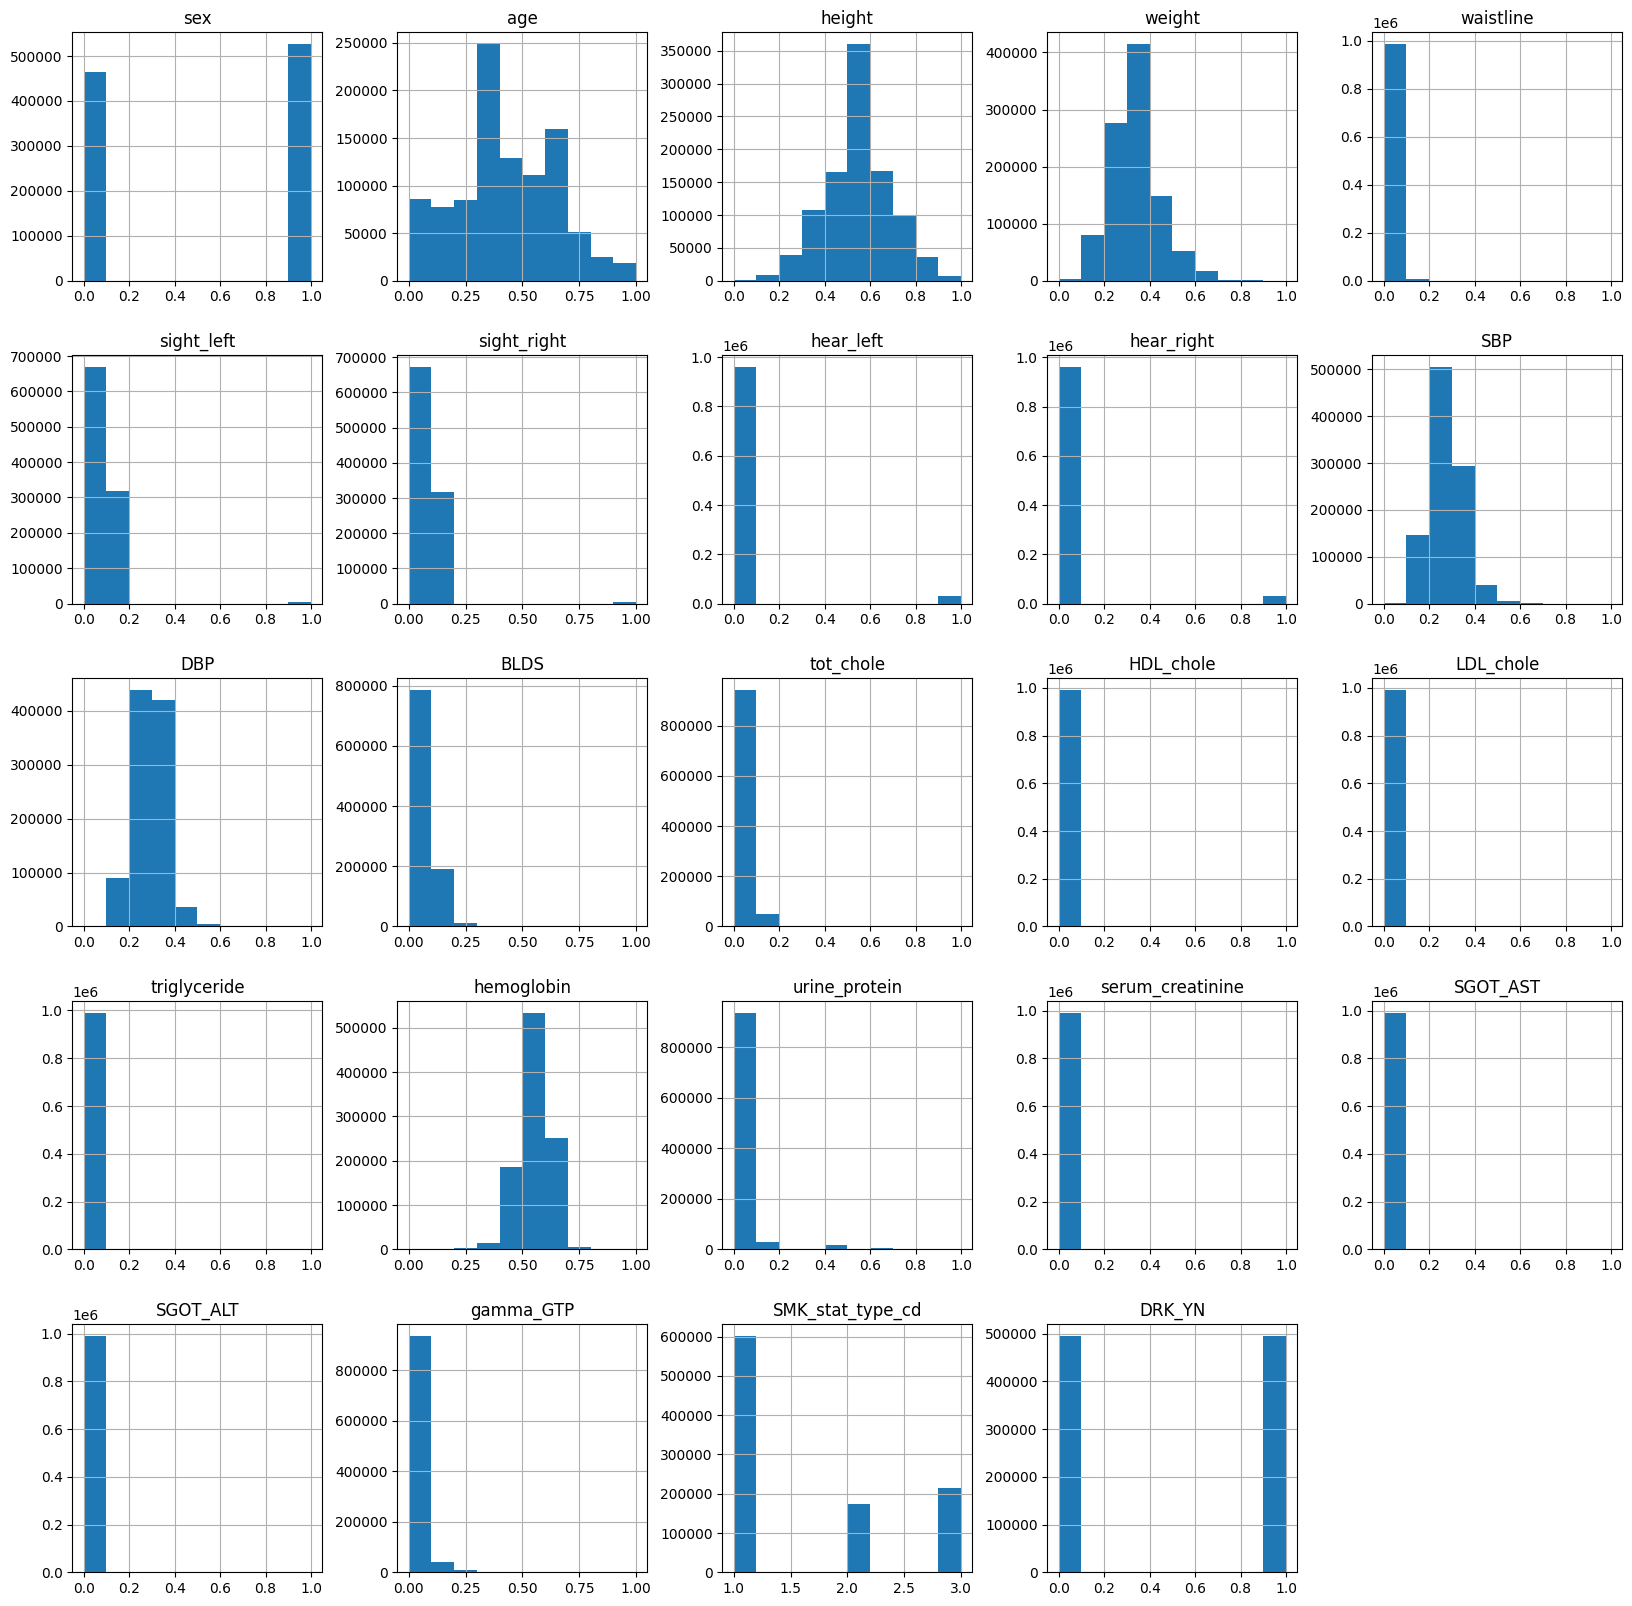

In [17]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show()

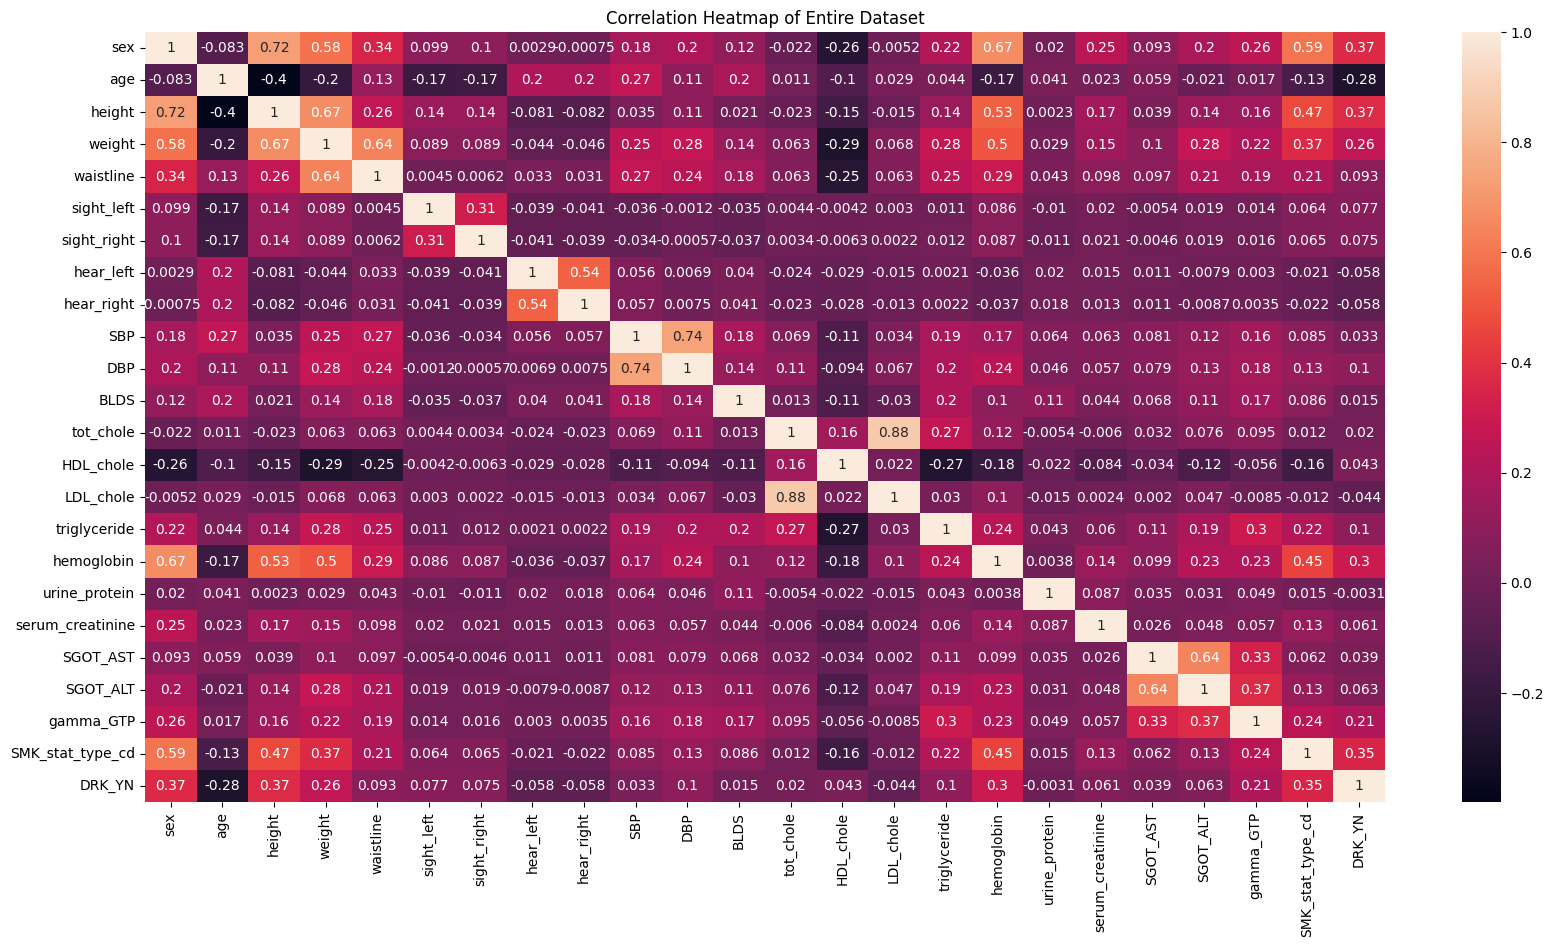

In [18]:
import seaborn as srn
plt.figure(figsize=(20, 10))
p = srn.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Entire Dataset")
plt.show()

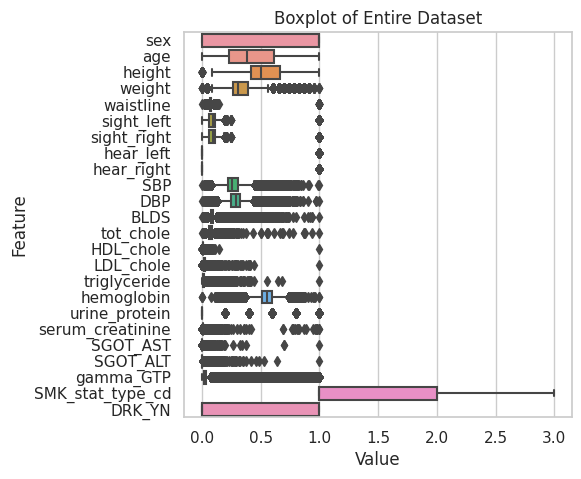

In [19]:
srn.set(style="whitegrid")
plt.figure(figsize=(5, 5))
srn.boxplot(df, orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Entire Dataset")
plt.show()

# **Principal Component Analysis**

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principal_components = pca.fit_transform(df.iloc[:,0:22])


# **Logistic Regression**

**SmokerType**

Individual fold scores: [0.66942553 0.66882367 0.66632706 0.66889428 0.66877828]
Mean score: 0.6684497632756197
Standard Deviation: 0.0010865826809956804


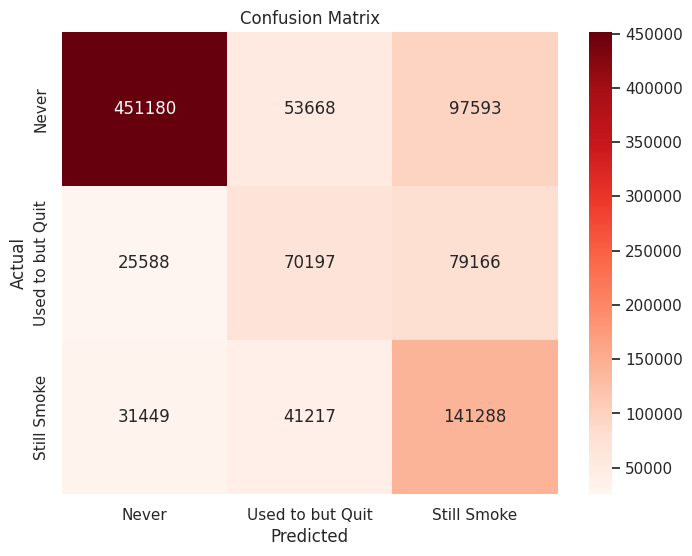

Accuracy: 0.6684497642599052
Precision: 0.7104168882890378
Recall: 0.6684497642599052
F1 Score: 0.6812292691031128


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.SMK_stat_type_cd

lr = LogisticRegression()

scores = cross_val_score(lr, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(lr, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Never', 'Used to but Quit', 'Still Smoke'], yticklabels=['Never', 'Used to but Quit', 'Still Smoke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

**DrinkerType**

Individual fold scores: [0.70294548 0.70172342 0.70207647 0.70349374 0.70262623]
Mean score: 0.7025730669489649
Standard Deviation: 0.0006257260531423136


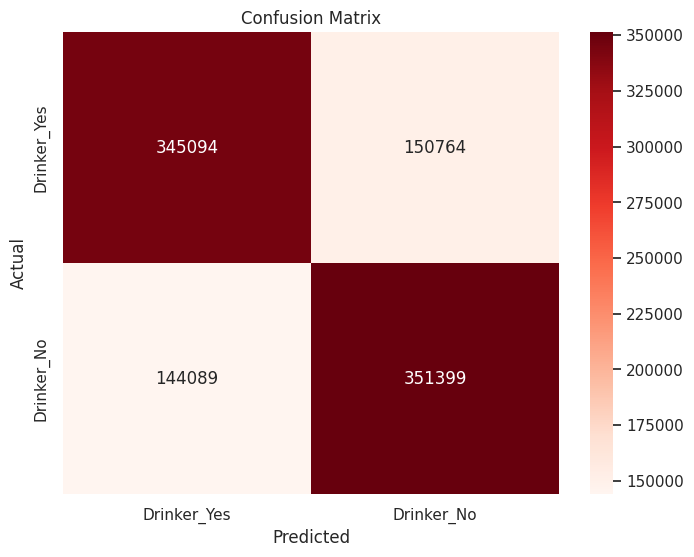

Accuracy: 0.7025730673246273
Precision: 0.69977079155573
Recall: 0.7091978009558254
F1 Score: 0.704452759532141


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.DRK_YN

lr = LogisticRegression()

scores = cross_val_score(lr, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(lr, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Drinker_Yes', 'Drinker_No'], yticklabels=['Drinker_Yes', 'Drinker_No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# **K Nearest Neighbors**

**SmokerType**

Individual fold scores: [0.63948152 0.64025642 0.64065991 0.64118445 0.63885428]
Mean score: 0.6400873162405468
Standard Deviation: 0.0008303650745195802


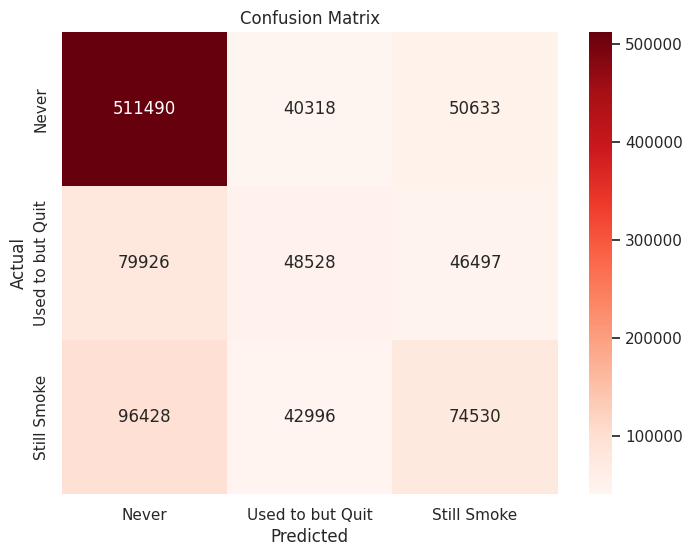

Accuracy: 0.6400873156294573
Precision: 0.6105552396642778
Recall: 0.6400873156294573
F1 Score: 0.6210608513839609


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.SMK_stat_type_cd

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(knn, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Never', 'Used to but Quit', 'Still Smoke'], yticklabels=['Never', 'Used to but Quit', 'Still Smoke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

**DrinkerType**

Individual fold scores: [0.64374842 0.64529503 0.64656099 0.64548669 0.64434682]
Mean score: 0.6450875893372905
Standard Deviation: 0.0009711134531778933


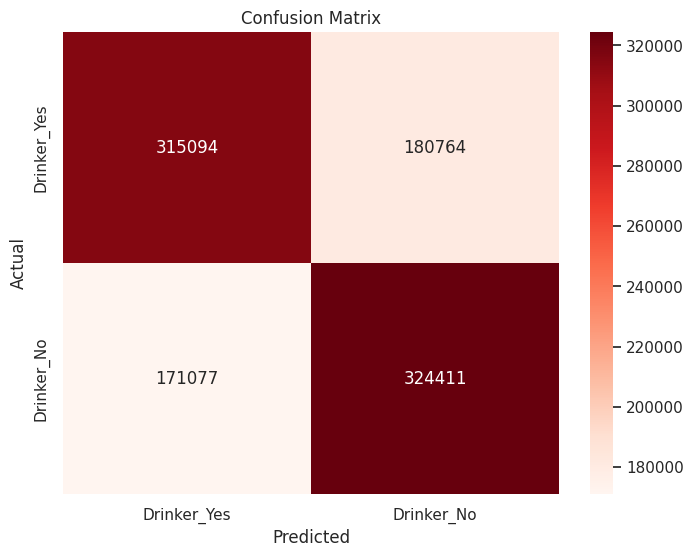

Accuracy: 0.6450875879864346
Precision: 0.6421754837432573
Recall: 0.6547302861017825
F1 Score: 0.6483921160270739


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.DRK_YN

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(knn, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Drinker_Yes', 'Drinker_No'], yticklabels=['Drinker_Yes', 'Drinker_No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# **Naive Bayes**

**SmokerType**

Individual fold scores: [0.66018056 0.66000232 0.65860018 0.65920542 0.6593416 ]
Mean score: 0.6594660182070198
Standard Deviation: 0.0005711829072503009


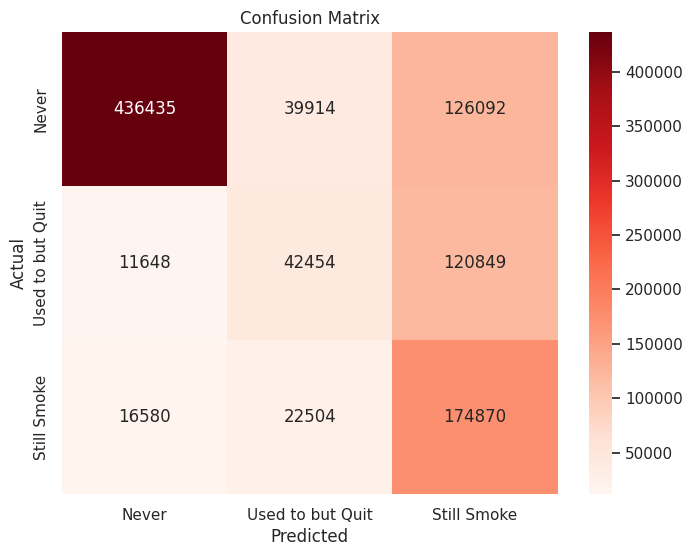

Accuracy: 0.6594660189278012
Precision: 0.7316971830721063
Recall: 0.6594660189278012
F1 Score: 0.6693617016865501


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.SMK_stat_type_cd

nb = GaussianNB()

scores = cross_val_score(nb, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(nb, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Never', 'Used to but Quit', 'Still Smoke'], yticklabels=['Never', 'Used to but Quit', 'Still Smoke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

**DrinkerType**

Individual fold scores: [0.64895849 0.65121628 0.65382889 0.65311269 0.64678795]
Mean score: 0.6507808593794382
Standard Deviation: 0.0026146457945693483


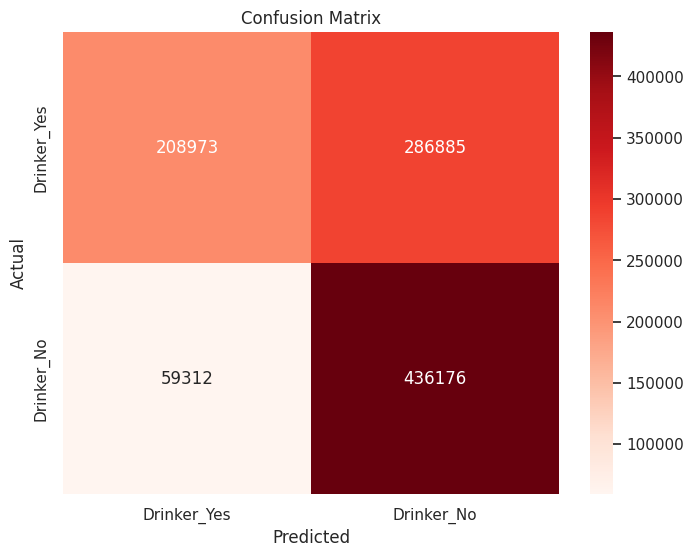

Accuracy: 0.6507808575411612
Precision: 0.6032354116734273
Recall: 0.8802957892017567
F1 Score: 0.7158940674523552


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.DRK_YN

nb = GaussianNB()

scores = cross_val_score(nb, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(nb, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Drinker_Yes', 'Drinker_No'], yticklabels=['Drinker_Yes', 'Drinker_No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# **DecisionTree**

**SmokerType**

Individual fold scores: [0.61320422 0.61488685 0.61266764 0.61255668 0.61347967]
Mean score: 0.6133590090188417
Standard Deviation: 0.0008360062244165482


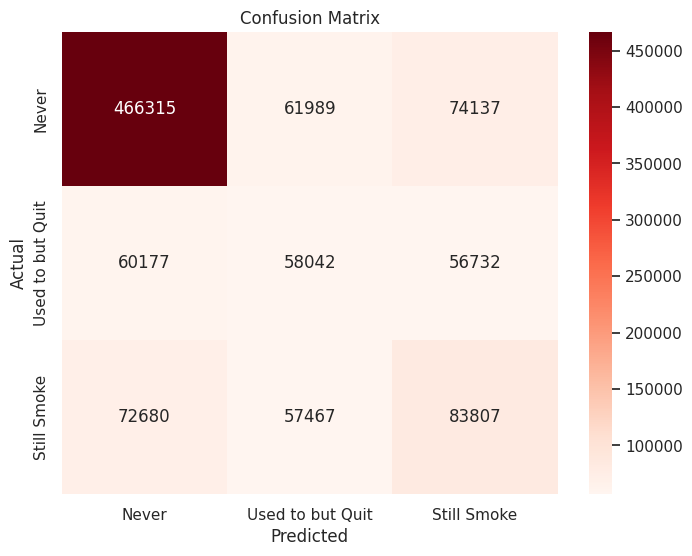

Accuracy: 0.6134729953013378
Precision: 0.6149148923979968
Recall: 0.6134729953013378
F1 Score: 0.6141871778110551


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.SMK_stat_type_cd

dt = DecisionTreeClassifier(criterion='gini', max_depth=None)

scores = cross_val_score(dt, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(dt, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Never', 'Used to but Quit', 'Still Smoke'], yticklabels=['Never', 'Used to but Quit', 'Still Smoke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

**DrinkerType**

Individual fold scores: [0.61447521 0.61308122 0.61424126 0.61492719 0.6163142 ]
Mean score: 0.6146078161737734
Standard Deviation: 0.0010484462496335213


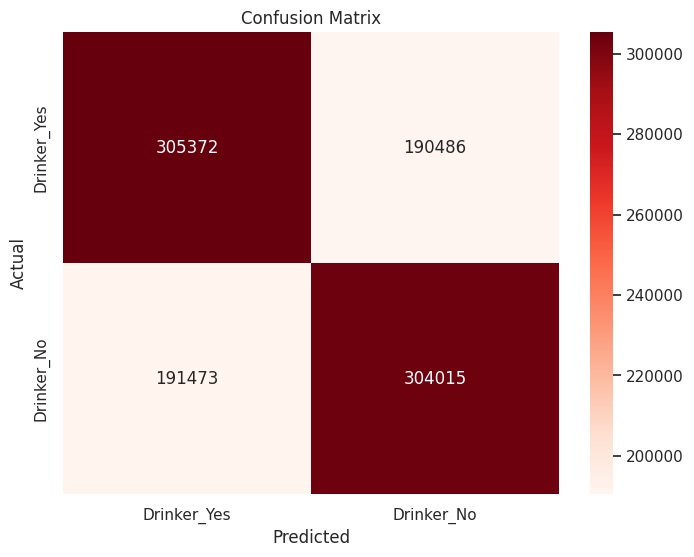

Accuracy: 0.614706671535468
Precision: 0.6147914766603101
Recall: 0.6135668270472746
F1 Score: 0.6141785413777325


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.DRK_YN

dt = DecisionTreeClassifier(criterion='gini', max_depth=None)

scores = cross_val_score(dt, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(dt, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Drinker_Yes', 'Drinker_No'], yticklabels=['Drinker_Yes', 'Drinker_No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# **Random Forest**

**SmokerType**

Individual fold scores: [0.66743834 0.66742153 0.66725005 0.66696256 0.66614045]
Mean score: 0.667042586144741
Standard Deviation: 0.0004823952745559784


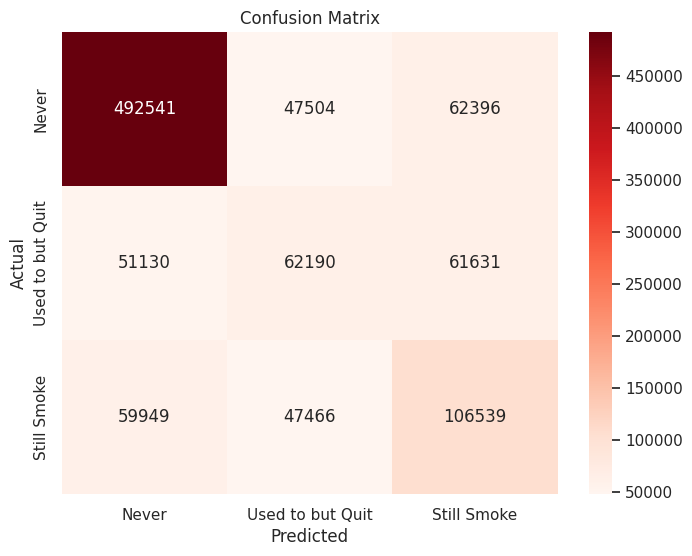

Accuracy: 0.6670425865439513
Precision: 0.6654306941396668
Recall: 0.6670425865439513
F1 Score: 0.6659012720597013


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.SMK_stat_type_cd

rf = RandomForestClassifier(n_estimators=100, random_state=0)

scores = cross_val_score(rf, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(rf, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Never', 'Used to but Quit', 'Still Smoke'], yticklabels=['Never', 'Used to but Quit', 'Still Smoke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

**DrinkerType**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.DRK_YN

rf = RandomForestClassifier(n_estimators=100, random_state=0)

scores = cross_val_score(rf, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(rf, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Drinker_Yes', 'Drinker_No'], yticklabels=['Drinker_Yes', 'Drinker_No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)